<a href="https://colab.research.google.com/github/AliNaseem123456789/Trash_Detection-Yolov8n/blob/main/FYDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Import OS Library for directory setup**

In [ ]:
import os
os.chdir("/content/drive/MyDrive/training_model2")

**Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

In [ ]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

**Train the Model**

Before Training the model a data.yaml file is also defined which contains the path to images and labels and their respective test and validations directories

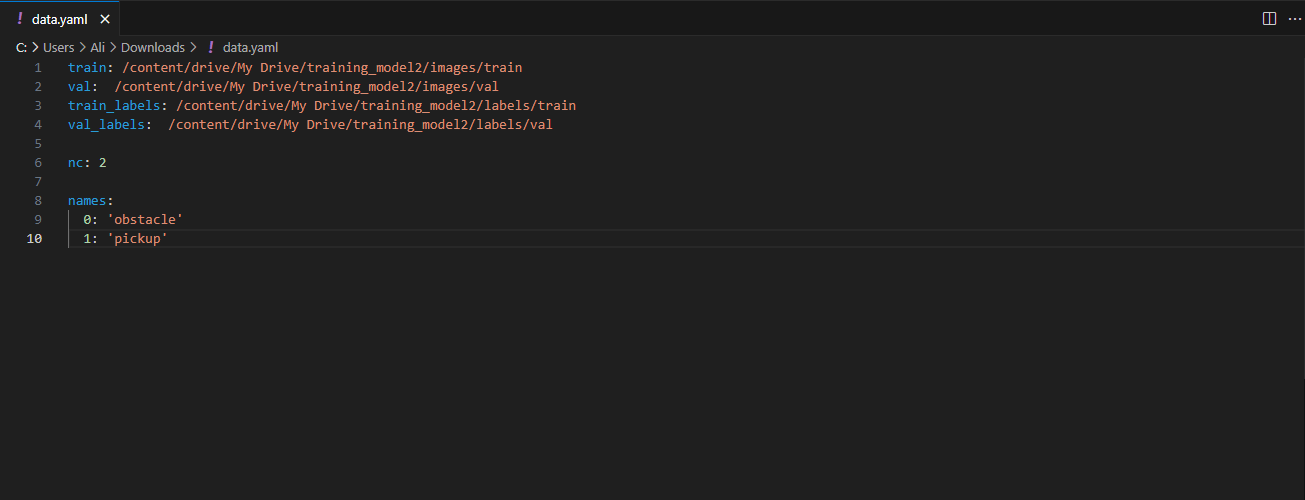

In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.train(data="data.yaml", epochs=60, imgsz=640,patience=10)

In [ ]:
# Load the previously saved model (e.g., from the best checkpoint or last checkpoint)
model = YOLO("runs/detect/train4/weights/best.pt")
results = model.train(
    data='data.yaml',  # Path to the new augmented dataset
    imgsz=640,  # Image size
    batch=8,  # Adjust batch size based on GPU memory
    epochs=20,  # Number of additional epochs
    device=0,  # Use the first GPU (Tesla T4)
    half=True,  # Enable mixed precision training for faster performance
    multi_scale=True  # Enable multi-scale training for better generalization
)


In [ ]:
model.info()

In [ ]:
hyp = model.args
print(hyp)

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO('runs/detect/train4/weights/best.pt')
cap = cv2.VideoCapture('test/test10.mp4')
output_path = 'output_videotest5.mp4'

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for box in results[0].boxes:  # results[0].boxes contains detected objects
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box coordinates
        confidence = box.conf[0]  # confidence score
        class_id = int(box.cls[0])  # class ID of detected object
        label = f"{model.names[class_id]} {confidence:.2f}"

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    out.write(frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
from ultralytics import YOLO

# Load YOLO model
model = YOLO('runs/detect/train4/weights/best.pt')

# Set up video input and output
cap = cv2.VideoCapture('test/test10.mp4')
output_path = 'output_videotestnew10.mp4'

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_skip = 4  # Process every 3rd frame
frame_count = 0  # Track the current frame number

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Only process every nth frame
    if frame_count % frame_skip == 0:
        results = model(frame)

        for box in results[0].boxes:  # results[0].boxes contains detected objects
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # bounding box coordinates
            confidence = box.conf[0]  # confidence score
            class_id = int(box.cls[0])  # class ID of detected object
            label = f"{model.names[class_id]} {confidence:.2f}"

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the frame (processed or not) to the output video
    out.write(frame)

    frame_count += 1

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


Using batch processing

In [ ]:

import cv2
from ultralytics import YOLO

# Load YOLO model
model = YOLO('runs/detect/train4/weights/best.pt')

# Set up video input and output
cap = cv2.VideoCapture('test/test10.mp4')
output_path = 'output_videotest_batch.mp4'

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

batch_size = 4  # Number of frames per batch
batch = []  # To store frames for batching
frames_to_write = []  # Store processed frames

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    batch.append(frame)

    # If batch is full, process it
    if len(batch) == batch_size:
        # Perform batch inference
        results = model(batch)  # YOLO processes all frames in the batch

        # Process each frame in the batch
        for i, result in enumerate(results):
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                confidence = box.conf[0]
                class_id = int(box.cls[0])
                label = f"{model.names[class_id]} {confidence:.2f}"
                cv2.rectangle(batch[i], (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(batch[i], label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            frames_to_write.append(batch[i])

        batch = []  # Clear the batch

# Write remaining unprocessed frames
for frame in frames_to_write:
    out.write(frame)

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training logs from YOLO
logs_path = 'runs/detect/train4/results.csv'
df = pd.read_csv(logs_path)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Classification Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Classification Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Validation Class Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Plot mAP@0.5 and mAP@[0.5:0.95]
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5 (B)', color='orange')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@[0.5:0.95] (B)', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Average Precision')
plt.title('mAP Over Epochs')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming df contains mAP over epochs

# Extract final mAP values from the DataFrame at the last epoch
final_mAP_0_5 = df['metrics/mAP50(B)'].iloc[-1]  # mAP@0.5 at final epoch
final_mAP_0_5_95 = df['metrics/mAP50-95(B)'].iloc[-1]  # mAP@[0.5:0.95] at final epoch

# Calculate Error Rate
error_rate_0_5 = 1 - final_mAP_0_5
error_rate_0_5_95 = 1 - final_mAP_0_5_95

print(f"Final mAP@0.5: {final_mAP_0_5}")
print(f"Final mAP@[0.5:0.95]: {final_mAP_0_5_95}")
print(f"Error Rate for mAP@0.5: {error_rate_0_5}")
print(f"Error Rate for mAP@[0.5:0.95]: {error_rate_0_5_95}")

# Plot mAP over epochs
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5 (B)', color='orange')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@[0.5:0.95] (B)', color='red')
plt.xlabel('Epochs')
plt.ylabel('Mean Average Precision')
plt.title('mAP Over Epochs')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot Precision and Recall over epochs
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision (B)', color='blue')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall (B)', color='green')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Precision and Recall Over Epochs')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Get the final epoch values for precision and recall
final_precision = df['metrics/precision(B)'].iloc[-1]  # Precision at the last epoch
final_recall = df['metrics/recall(B)'].iloc[-1]  # Recall at the last epoch

print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")


In [ ]:
import pandas as pd

# Path to your results.csv
logs_path = 'runs/detect/train4/results.csv'
df = pd.read_csv(logs_path)

# Display all column names
print(df.columns)


In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
os.listdir()

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the YOLO model
model = YOLO('training_model2/runs/detect/train3/weights/best.pt')

# Video input and output
cap = cv2.VideoCapture('Training_Model/test7.mp4')
output_path = 'training_model2/test/output_videotest_test1.mp4'

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Define a color map for different classes
color_map = {
    0: (0, 255, 0),  # Green for class 0
    1: (0, 0, 255),  # Red for class 1
    # Add more colors for other classes if needed
}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference
    results = model(frame)

    # Loop through detections
    for box in results[0].boxes:  # results[0].boxes contains detected objects
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        confidence = box.conf[0]  # Confidence score
        class_id = int(box.cls[0])  # Class ID of detected object

        # Get the label and corresponding color
        label = f"{model.names[class_id]} {confidence:.2f}"
        color = color_map.get(class_id, (255, 255, 255))  # Default to white if class not in color_map

        # Draw bounding box and label
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the frame to the output video
    out.write(frame)

    # Uncomment to display the frame in real-time (optional)
    # cv2.imshow('YOLO Detection', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

cap.release()
out.release()
# cv2.destroyAllWindows()



In [ ]:
!pip install tensorflow


In [ ]:
from google.colab import files

# Upload the TFLite model
uploaded = files.upload()  # This opens a file picker in Colab


In [ ]:
!yolo export model=runs/detect/train3/weights/best.pt format=tflite



In [ ]:
import tensorflow as tf
import numpy as np

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="runs/detect/train3/weights/best_saved_model/best_float32.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Create a dummy input (replace with actual image data)
input_shape = input_details[0]['shape']
input_data = np.random.random(input_shape).astype(np.float32)

# Perform inference
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Get the results
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Output:", output_data)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="runs/detect/train3/weights/best_saved_model/best_float32.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Get the expected input size for the TFLite model
input_height, input_width = input_details[0]['shape'][1:3]

# Set up video input and output
cap = cv2.VideoCapture('test/test1.mp4')
output_path = 'output_tflite_videotest1.mp4'

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_skip = 3  # Process every 3rd frame
frame_count = 0  # Track the current frame number

# Class names (ensure you update with the correct names from your model)
class_names = ['obtacle', 'pickup']  # Replace with your actual class names

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Only process every nth frame
    if frame_count % frame_skip == 0:
        # Preprocess the frame for the TFLite model
        resized_frame = cv2.resize(frame, (input_width, input_height))
        input_data = np.expand_dims(resized_frame, axis=0).astype(np.float32)

        # Normalize image data if needed (depending on model preprocessing)
        input_data = input_data / 255.0

        # Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Extract output data
        output_data = interpreter.get_tensor(output_details[0]['index'])

        # Ensure output_data has the correct shape
        if output_data.shape[-2:] != (6, 8400):
            print("Unexpected output shape:", output_data.shape)
            continue

        # Parse the output (adjust based on your model's output structure)
        for i in range(output_data.shape[-1]):
            detection = output_data[0, :, i]
            x1, y1, x2, y2, confidence, class_id = detection
            if confidence > 0.5:  # Confidence threshold
                x1 = int(x1 * width / input_width)
                y1 = int(y1 * height / input_height)
                x2 = int(x2 * width / input_width)
                y2 = int(y2 * height / input_height)
                label = f"{class_names[int(class_id)]} {confidence:.2f}"

                # Draw the bounding box and label
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the frame (processed or not) to the output video
    out.write(frame)

    frame_count += 1

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Processed video saved at {output_path}")


In [ ]:
output_details = interpreter.get_output_details()
print(output_details)


In [ ]:
I am giving uou the struture of my data.
I have two folders
wrapper_0,wrapper_1 till wrapper_74 are wrappers of pickup class.
while train_obstacle1_0000,train_obstacle2_0002,,train_obstacle3_0001 etc are obstacle.also obstacle_0100 are also obstacles. Bascially starting with train_obstacle,obstacle followed by a number are obstacle.